In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV ,RandomizedSearchCV

# A1

In [60]:
data=pd.read_csv('breastCancer.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [61]:
def classChanger(val):
    if val=='M':
        return 0
    return 1
X=data.drop(columns=['diagnosis','id'])
X=pd.DataFrame(StandardScaler().fit_transform(data.drop(columns=['diagnosis','id'])),columns=X.columns)
Y=data['diagnosis'].apply(classChanger)
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


In [62]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)

In [63]:
neigh=KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=3)

In [64]:
print("Train Confusion Matrix:")
print(confusion_matrix(Y_train, y_train_pred))

print("\nTest Confusion Matrix:")
print(confusion_matrix(Y_test, y_test_pred))

print("\nTrain Classification Report:")
print(classification_report(Y_train, y_train_pred))

print("\nTest Classification Report:")
print(classification_report(Y_test, y_test_pred))

train_report = classification_report(Y_train, y_train_pred, output_dict=True)
test_report = classification_report(Y_test, y_test_pred, output_dict=True)

train_f1 = train_report["weighted avg"]["f1-score"]
test_f1 = test_report["weighted avg"]["f1-score"]

if train_f1 > test_f1 + 0.1:  
    print("\nInference: The model is overfitting (high performance on train data but low on test).")
elif train_f1 < 0.6 and test_f1 < 0.6:  
    print("\nInference: The model is underfitting (low performance on both train and test data).")
else:
    print("\nInference: The model is well-fitted (similar performance on both train and test data).")

Train Confusion Matrix:
[[ 55  89]
 [ 86 168]]

Test Confusion Matrix:
[[28 40]
 [37 66]]

Train Classification Report:
              precision    recall  f1-score   support

           0       0.39      0.38      0.39       144
           1       0.65      0.66      0.66       254

    accuracy                           0.56       398
   macro avg       0.52      0.52      0.52       398
weighted avg       0.56      0.56      0.56       398


Test Classification Report:
              precision    recall  f1-score   support

           0       0.43      0.41      0.42        68
           1       0.62      0.64      0.63       103

    accuracy                           0.55       171
   macro avg       0.53      0.53      0.53       171
weighted avg       0.55      0.55      0.55       171


Inference: The model is underfitting (low performance on both train and test data).


# A2

In [66]:
data=pd.read_csv("purchaseData.csv")
data

,Customer,Candies (#),Mangoes (Kg),Milk Packets (#),Payment (Rs)
0,C_1,20,6,2,386
1,C_2,16,3,6,289
2,C_3,27,6,2,393
3,C_4,19,1,2,110
4,C_5,24,4,2,280
5,C_6,22,1,5,167
6,C_7,15,4,2,271
7,C_8,18,4,2,274
8,C_9,21,1,4,148
9,C_10,16,2,4,198


In [67]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

A = data.drop(columns=['Customer', 'Payment (Rs)']) 
B = data['Payment (Rs)'] 
pseudo_inverse = np.linalg.pinv(A)
X = pseudo_inverse @ B

B_pred = A @ X  
mse = mean_squared_error(B, B_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(B, B_pred)
r2 = r2_score(B, B_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape * 100:.2f}%")
print(f"R² Score: {r2:.4f}")
if r2 > 0.9:
    print("\nInference: The model has a strong predictive performance.")
elif r2 > 0.7:
    print("\nInference: The model performs well but can be improved.")
elif r2 > 0.5:
    print("\nInference: The model has moderate performance and may need better feature selection.")
else:
    print("\nInference: The model has weak predictive power, indicating potential underfitting.")


Mean Squared Error (MSE): 0.0000
Root Mean Squared Error (RMSE): 0.0000
Mean Absolute Percentage Error (MAPE): 0.00%
R² Score: 1.0000

Inference: The model has a strong predictive performance.


# A3

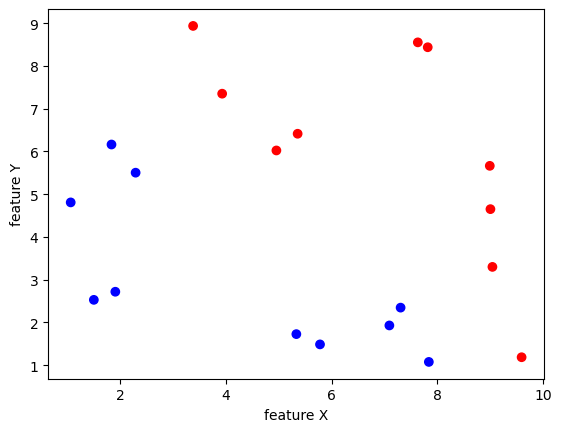

In [26]:

X = np.random.uniform(1,10,20)
Y = np.random.uniform(1,10,20)

classes = np.array([1 if x + y > 10 else 0 for x, y in zip(X, Y)]) 
colors = np.array(['blue', 'red'])[classes]  
def scatter_plot(X,Y,colors):
  plt.scatter(X,Y,c=colors)
  plt.xlabel("feature X")
  plt.ylabel("feature Y")
  plt.show()

scatter_plot(X,Y,colors)


# A4

In [ ]:
train_data = np.column_stack((X, Y))
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(train_data,classes)

X_test = np.arange(0,10.1,0.1)
Y_test = np.arange(0,10.1,0.1)
test_points = np.c_[X_test, Y_test]
test_classes = neigh.predict(test_points)
Colors = np.array(['blue', 'red'])[test_classes]
scatter_plot(X_test,Y_test,Colors)

# A5

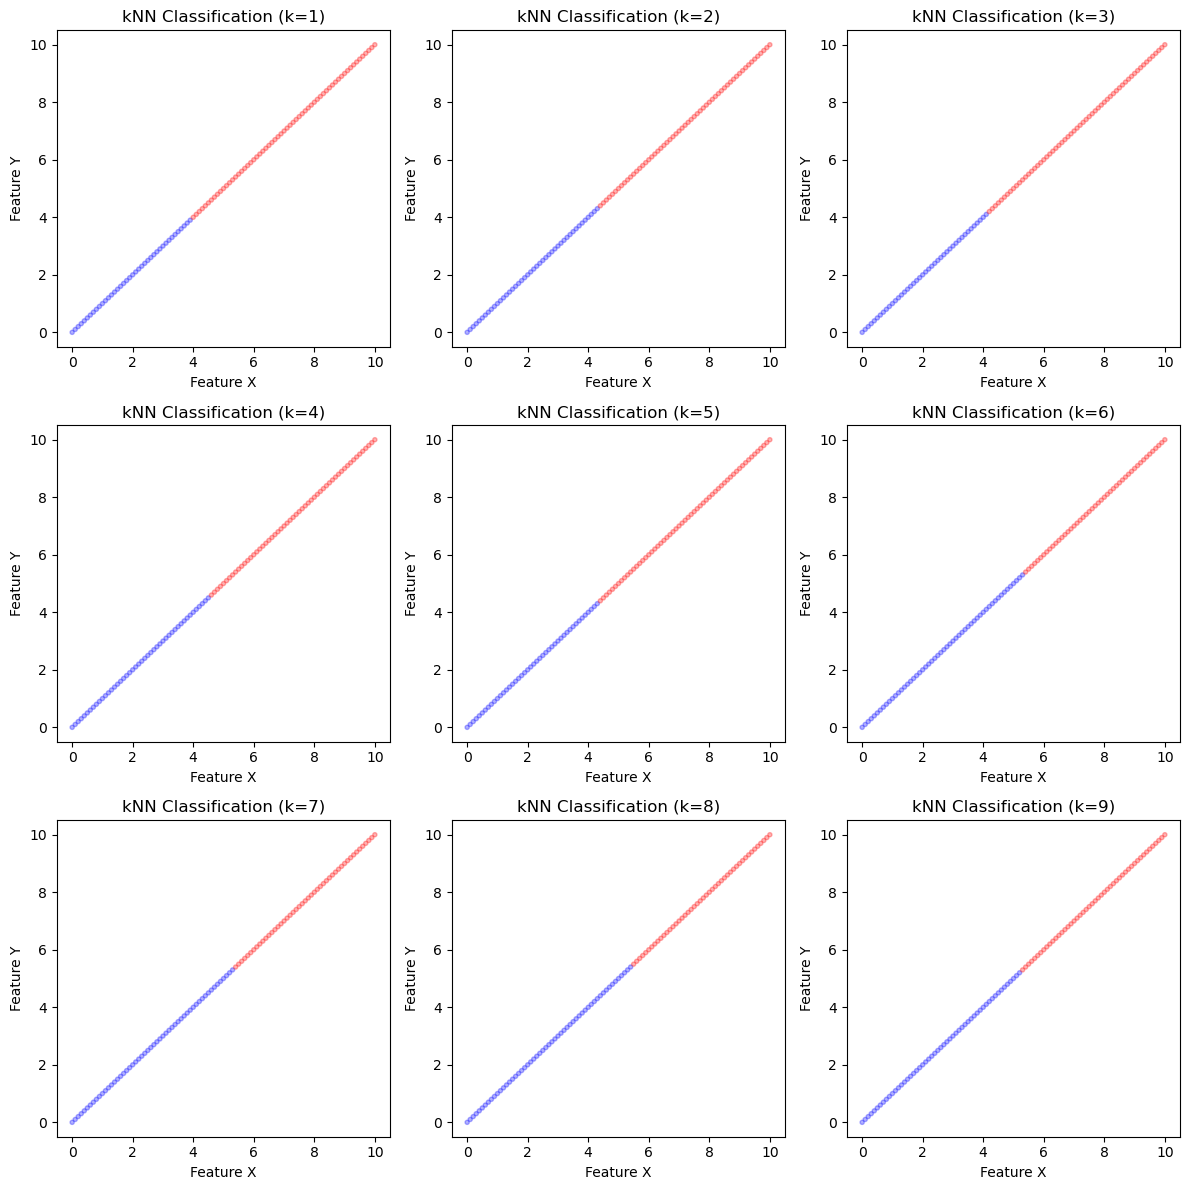

In [32]:
def scatter_plot_ss(X, Y, colors, title):
    plt.scatter(X, Y, c=colors, marker='.', alpha=0.3)
    plt.xlabel("Feature X")
    plt.ylabel("Feature Y")
    plt.title(title)

def knn_classification(k_values, train_data, classes,test_points):
    plt.figure(figsize=(12, 12))
    for i, k in enumerate(k_values, 1):
        neigh = KNeighborsClassifier(n_neighbors=k)
        neigh.fit(train_data, classes)

        test = test_points

        test_classes = neigh.predict(test_points)
        colors = np.array(['blue', 'red'])[test_classes]

        plt.subplot(3, 3, i)
        scatter_plot_ss(test[:,0], test[:,1],colors ,f"kNN Classification (k={k})")

    plt.tight_layout()
    plt.show()
k_values = list(range(1, 10))

X_test = np.arange(0, 10.1, 0.1)
Y_test = np.arange(0, 10.1, 0.1)
test_points = np.c_[X_test, Y_test]

knn_classification(k_values, train_data, classes,test_points )





# A6

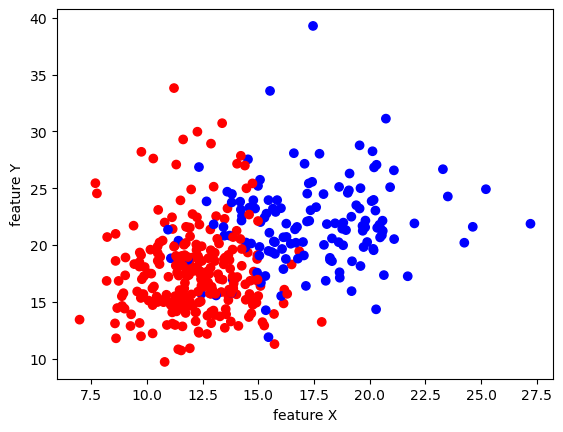

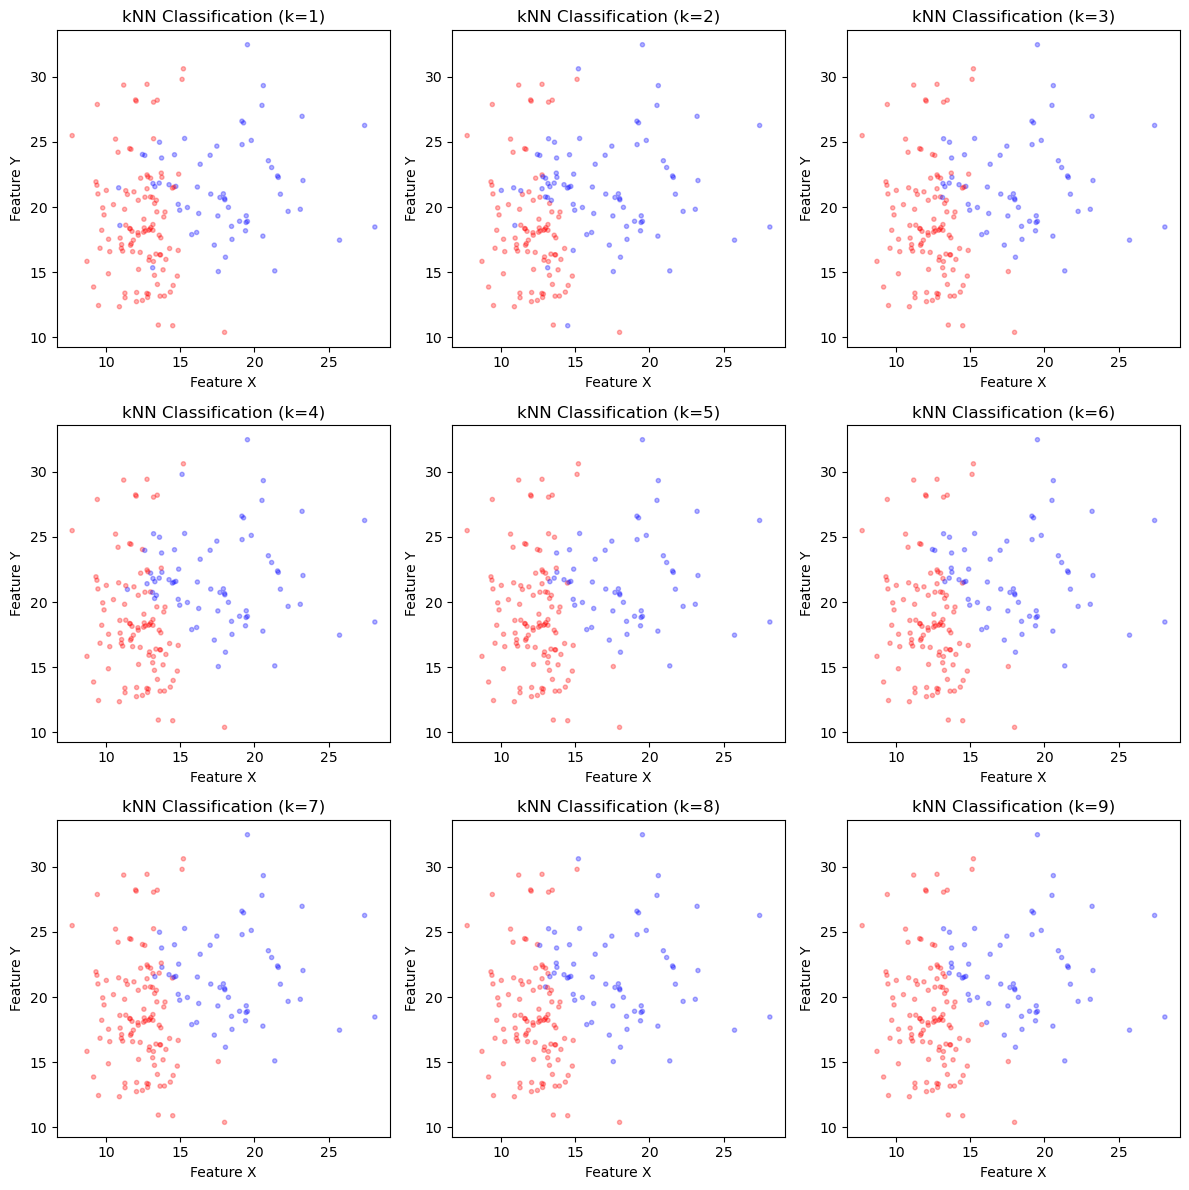

In [72]:
feature1 = 'radius_mean'
feature2 = 'texture_mean'
data=pd.read_csv('breastCancer.csv')
def classChanger(val):
    if val=='M':
        return 0
    return 1
X = data[[feature1, feature2]].values
y = data['diagnosis'].apply(classChanger).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

scatter_plot(X_train[:,0],X_train[:,1],np.array(['blue', 'red'])[y_train])

k_values = list(range(1,10))
knn_classification(k_values, X_train, y_train,X_test )

# A7

In [39]:
param_grid = {'n_neighbors': list(range(1,11))} 
neigh = KNeighborsClassifier()

grid_search = GridSearchCV(neigh, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, Y_train)

print(f"Best k (Randomized): { grid_search.best_params_['n_neighbors'] }")

random_search = RandomizedSearchCV(neigh, param_grid, n_iter=10, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)
random_search.fit(X_train, Y_train)

print(f"Best k (Randomized): {random_search.best_params_['n_neighbors']}")



Best k (Randomized): 3
Best k (Randomized): 3
